In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Activation Function


![test](https://www.i2tutorials.com/wp-content/uploads/2019/09/Deep-learning-25-i2tutorials.png)



In [27]:
def relu(z, deriv=False):
    activations = []
    shape = z.shape
    z = z.flatten()
    if deriv:  # Return Derivative of Function
        
        for i in range(len(z)):  # Element Wise
            if z[i] >= 0:
                activations.append(1)
            else:
                activations.append(0.2)
                
        return np.array(activations).reshape(shape)
    
    for i in range(len(z)):
        if z[i] > 0:
            activations.append(z[i])
        else:
            activations.append(0.2 * z[i])
            
    return np.array(activations).reshape(shape)

input = [1.,0.,-5.]
print('LeakyReLU: ', input, ' -> ', list(relu(np.array(input))))

print('LeakyReLU (deriv): ', input, ' -> ', list(relu(np.array(input), True)))

LeakyReLU:  [1.0, 0.0, -5.0]  ->  [1.0, 0.0, -1.0]
LeakyReLU (deriv):  [1.0, 0.0, -5.0]  ->  [1.0, 1.0, 0.2]


# Weight & Bias Initialization

Bias Values ($b$) are initialized with $0$.  
Weight Values ($w$) are initialized with random values between $min$ and $max$.

## Neural Network Structure

**Neural Net Structure** `2 (Input) - 3 (Hidden) - 3 (Hidden) - 2 (Output)`

In [28]:
def initialize(min=0, max=1, do_print=True):
    global w, b
    w = [
            max * np.random.uniform(min, max, (2, 3)),
            max * np.random.uniform(min, max, (3, 3)),
            max * np.random.uniform(min, max, (3, 2)),
            max * np.random.uniform(min, max, (2, 1))
        ]
    b = [
        np.array(np.zeros(3)),
        np.array(np.zeros(3)),
        np.array(np.zeros(2)),
        np.array(np.zeros(1))
    ]
    if do_print:
        for i in range(len(b)): print(f'Layer {i}:\nWeights:\n {w[i]} (Shape: {w[i].shape})\nBias: \n{b[i]} (Shape: {b[i].shape})\n')    

w, b = [], []

initialize(-1,1)

Layer 0:
Weights:
 [[ 0.746  0.977 -0.085]
 [-0.785 -0.842 -0.743]] (Shape: (2, 3))
Bias: 
[0. 0. 0.] (Shape: (3,))

Layer 1:
Weights:
 [[-0.796 -0.006  0.032]
 [ 0.078 -0.052  0.457]
 [ 0.993  0.848  0.883]] (Shape: (3, 3))
Bias: 
[0. 0. 0.] (Shape: (3,))

Layer 2:
Weights:
 [[ 0.544 -0.945]
 [-0.226  0.87 ]
 [-0.871 -0.589]] (Shape: (3, 2))
Bias: 
[0. 0.] (Shape: (2,))

Layer 3:
Weights:
 [[0.692]
 [0.387]] (Shape: (2, 1))
Bias: 
[0.] (Shape: (1,))



# Forward Propagation
List $a$ holds each layers activation vector.  
List $z$ holds each layers pre nonlinearity vector.

## Algorithm

For each layer $L$, starting with $L_0$ we multiply the $h$ vector with the weight matrix $w$.

$$
w = \left[ \begin{array}{rrr}
1.3 & 0.2 \\                                              
0.1 & 1.4 \\
1.2 & 0 \\
\end{array}\right] \ \ \ \ \ \ \ 
h = \left( \begin{array}{rrr}
1.3 \\                                              
0.1 \\
1.2 \\
\end{array}\right)
$$

In [46]:
a, z = [], []  # Global Variables

initialize(do_print=False)  # Weight & Bias Initialization

def forward_prop(X, do_print=False):
    h = np.array([X])
    if do_print: print('h: ', h, h.shape)
    global a, z
    a,z  = [], []
    for i in range(len(w)):
        if do_print: print(f'Layer {i} | {h} dot {w[i]}')
        h = h @ w[i] # weigt * input
        h = h + b[i] # bias add
        z.append(h)
        h = relu(h) # Activation Function
        a.append(h)
    return h

forward_prop(np.array([0,1]), True)

h:  [[0 1]] (1, 2)
Layer 0 | [[0 1]] dot [[0.289 0.406 0.787]
 [0.666 0.232 0.729]]
Layer 1 | [[0.666 0.232 0.729]] dot [[6.192e-04 3.636e-01 5.763e-01]
 [8.018e-01 5.606e-02 4.077e-01]
 [5.536e-01 5.455e-01 3.356e-01]]
Layer 2 | [[0.59  0.653 0.723]] dot [[0.903 0.748]
 [0.943 0.387]
 [0.318 0.345]]
Layer 3 | [[1.378 0.943]] dot [[0.361]
 [0.164]]


array([[0.652]])

# Back-propagation


$g = loss'(X,y)$

## for each layer

### Step 1 ($a$ to $z$)

$g = relu'(z)$



### Step 2 ($z$ to $W$)

$g = relu'(z) * a_{L-1}$

In [5]:
learning_rate = 0.05

initialize(do_print=False)

def back_prop(X, y, print_loss=False):
    global a, z, w, b

    loss = 0.5*(y - X)**2  #  Calculate Loss Value
    g = (X - y).reshape(1,-1).T  # Loss Function Derivative
    
    if print_loss:  # Print Loss 
        print("Loss: ", (y - X)**2)
    
    n_weights, n_bias = [], []
    
    for x in range(len(w)):  # Iterate through NN Layers
        i = len(b) - 1 - x  # Reverse Index

        # Activation Function Derivative 
        g = g * relu(z[i], True)  # Activation Function Derivative
        
        # Derivative with respect to weight
        if i-1 < 0: w_der = y.reshape(1,-1).T
        else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation
        
        # Change in Weights & Bias
        n_weights.append(w[i] - learning_rate * (w_der @ g))
        n_bias.append(b[i] - learning_rate * g)
        
        # Deriv for next Layer
        g = g @ w[i].T 
    
    # Updating Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    
    return loss
    

X = forward_prop(np.array([0,1]))
print(X)
back_prop(X, np.array([1]))

[1.39361445]


array([0.07746617])

# Training Function

## Adding 2 Numbers

We train a simple Function $f^*(x)=x_1+x_2$

In [96]:
from random import randint

def train(epochs, size=100):
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,1)  # X1
            y2 = randint(0,1)  # X2
            tmp += back_prop(forward_prop(np.array([y1,y2])), np.array([y1+y2]))[0]
        print(f'Epoch {i} | Loss: ', tmp/size)

initialize(do_print=False)
train(20, 100)

print('\nInput:')
print(np.array([[0.2,0.3], 
     [0.7, 0.2], 
     [1.,0.], 
     [1,1]]), '\nOutput:')
print(forward_prop(np.array([[0.2,0.3], 
                             [0.7, 0.2], 
                             [1.,0.], 
                             [1,1]]))[0])

Epoch 0 | Loss:  [0.014]
Epoch 1 | Loss:  [4.835e-05]
Epoch 2 | Loss:  [3.136e-05]
Epoch 3 | Loss:  [2.846e-05]
Epoch 4 | Loss:  [2.4e-05]
Epoch 5 | Loss:  [2.497e-05]
Epoch 6 | Loss:  [2.929e-05]
Epoch 7 | Loss:  [3.049e-05]
Epoch 8 | Loss:  [2.423e-05]
Epoch 9 | Loss:  [2.968e-05]
Epoch 10 | Loss:  [2.634e-05]
Epoch 11 | Loss:  [2.389e-05]
Epoch 12 | Loss:  [1.908e-05]
Epoch 13 | Loss:  [2.024e-05]
Epoch 14 | Loss:  [2.019e-05]
Epoch 15 | Loss:  [1.746e-05]
Epoch 16 | Loss:  [2.067e-05]
Epoch 17 | Loss:  [1.663e-05]
Epoch 18 | Loss:  [1.882e-05]
Epoch 19 | Loss:  [1.815e-05]

Input:
[[0.2 0.3]
 [0.7 0.2]
 [1.  0. ]
 [1.  1. ]] 
Output:
[[0.497]
 [0.901]
 [1.005]
 [1.997]]


## Learning XOR

Loss:  [0.123]
Loss:  [0.112]
Loss:  [0.13]
Loss:  [0.124]
Loss:  [0.086]
Loss:  [0.063]
Loss:  [0.035]
Loss:  [0.05]
Loss:  [0.032]
Loss:  [0.06]
Loss:  [0.143]
Loss:  [0.136]
Loss:  [0.096]
Loss:  [0.003]
Loss:  [0.001]
Loss:  [0.001]
Loss:  [0.]
Loss:  [0.]
Loss:  [0.]
Loss:  [6.934e-05]
[[1.015]]
[[0.988]]
[[0.]]
[[-0.001]]


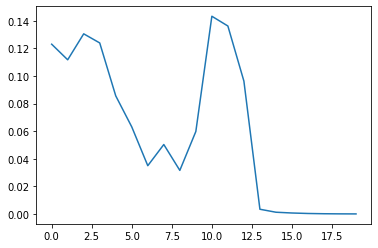

In [93]:
X = [
    [0,1],
    [0,0],
    [1,0],
    [1,1]
]   # Design Matrix 

y = [1,0,1,0]    # Labels

initialize(-1, 1, do_print=False)  # Reinitialize

def train(epochs, size=100):
    l = []
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,3)
            tmp += back_prop(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(tmp/size)
        print("Loss: ", tmp/size)
        if tmp/size < 0.0001: break
    return np.array(l).flatten()

loss_over_time =  train(300,600)

print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([0,1])))
print(forward_prop(np.array([0,0])))
print(forward_prop(np.array([1,1])))

plt.plot(loss_over_time)

# Recursive Backpropagation Implementation
Exmaple: Learning XOR

In [98]:
np.set_printoptions(precision=3)


def backprop_entry(X, y, print_loss=False):
    global a, z, w, b, n_weights, n_bias
    n_weights, n_bias = [], []
    
    backprop_rec(0, X, y)
    
    # Update Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    return 0.5*(y - X)**2  # Return Loss


def backprop_rec(i, X, y):
    global a, z, w, b, n_weights, n_bias

    # Base Case
    if i+1 > len(w): return (X - y).reshape(1,-1).T
    
    g = backprop_rec(i+1, X, y) * relu(z[i], True)  # Get Next Layer Derivative
    
    # Derivative with respect to weight [1xn]  
    if i-1 < 0: w_der = y.reshape(1,-1).T  # Input Matrix
    else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation

    # Save change in weights
    n_weights.append(w[i] - learning_rate * (w_der @ g))
    n_bias.append(b[i] - learning_rate * g)
    
    return g @ w[i].T 

def train_rec(epochs, size=100, threshold=0.0001):
    l = []
    for i in range(epochs):
        sum_loss = 0.0
        for x in range(size):
            y1 = randint(0,3)
            
            sum_loss += backprop_entry(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(sum_loss/size)
        print(f'[Epoch {i}] Loss: {l[-1]}')
        if l[-1] < threshold or l[-1] != l[-1]: break
    return np.array(l).flatten()

# Reinitialize Weights & Bias
initialize(-1, 1, do_print=False)

loss_over_time = train_rec(200,1000)


print(forward_prop(np.array([[1,0], 
                             [0,1], 
                             [1,1], 
                             [0,0]])))

[Epoch 0] Loss: [0.13]
[Epoch 1] Loss: [0.129]
[Epoch 2] Loss: [0.128]
[Epoch 3] Loss: [0.128]
[Epoch 4] Loss: [0.128]
[Epoch 5] Loss: [0.129]
[Epoch 6] Loss: [0.128]
[Epoch 7] Loss: [0.128]
[Epoch 8] Loss: [0.128]
[Epoch 9] Loss: [0.127]
[Epoch 10] Loss: [0.119]
[Epoch 11] Loss: [0.096]
[Epoch 12] Loss: [0.097]
[Epoch 13] Loss: [0.094]
[Epoch 14] Loss: [0.091]
[Epoch 15] Loss: [0.092]
[Epoch 16] Loss: [0.093]
[Epoch 17] Loss: [0.09]
[Epoch 18] Loss: [0.083]
[Epoch 19] Loss: [0.011]
[Epoch 20] Loss: [2.232e-07]
[[[1.000e+00]
  [1.000e+00]
  [4.996e-06]
  [5.688e-07]]]
